# Colab Setup

In [91]:
#from google.colab import drive
#drive.mount('/content/drive')

In [92]:
# Check python version
import sys
print(sys.version)

3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]


# Notebook on Data Queries
By Dane Morgan with a lot of materials taken from Nanohub tools developed by Zachary D. McClure and Alejandro Strachan, Materials Engineering, Purdue University

Learning goal: To learn general approaches to extract data from some major databases in an automated fashion through an Application Programming Interface (API).

## Getting started and hints
 * Remember to click "Shift+Return" or click "Run" from the top bar to run each cell.

## API keys
 Note that this notebook may contain API keys for other people than yourself so it can run easily to illustrate how it works. Before using it please replace these with your own API keys.

# Wolfram Alpha

Wolfram Alpha is a general data and app repository from the creator of Mathematica.  It has some pretty innovative technology and is good for math operations and science facts but I have not actually seen it used for large scale materials data.
* Try to just request api [access](https://products.wolframalpha.com/api/) (use the free version for now). Or
* Create an account at WolframAlpha. Request an AppID (API key) in the upper right corner after you login.
* This [guide](https://www.javatpoint.com/gui-assistant-using-wolfram-alpha-api-in-python#:~:text=The%20Python%20wolframalpha%20package%20can,%24%20pip%20install%20wolframalpha) might also be useful.

In [93]:
# Install it
#!pip install wolframalpha

In [94]:
# Import it
import wolframalpha

In [95]:
# Call WolframAlpha to collect data on melting temperatures. Note the very poor value of GaN (it should be about 2500 C) - not all data is accurate.
# Melting Temp
client = wolframalpha.Client("WRP7HK-TG6H88H2GY")
temp_list = []
query_list_all = ['Al2O3','PuO2','SiC','GaN']
for comp in query_list_all:
    res = client.query(comp + ' melting point')
    print(comp, next(res.results).text)
    t_melt = float(next(res.results).text[:-21])
    temp_list.append(t_melt)
print(temp_list)

Al2O3 2040 °C (degrees Celsius)
PuO2 2390 °C (degrees Celsius)
SiC 2700 °C (degrees Celsius)
GaN 5 °C (degrees Celsius)
[2040.0, 2390.0, 2700.0, 5.0]


# Chemistry data and Pubchem

* Code to access ChemBl and a bunch of cool molecular manipulations: https://github.com/chembl/chembl_webresource_client
* A short modeule on chemistry access, including some of the major chemistyr databases:  https://chem.libretexts.org/Courses/University_of_Arkansas_Little_Rock/ChemInformatics_(2015)%3A_Chem_4399_5399/Text/8_Interacting_with_Databases%3A_Desktop_and_Web_based_Applications#8.3


In [96]:
# Some notes
# Grab a file of SMILES strings of drug molecules form ChemBL database
# !wget https://raw.githubusercontent.com/PatWalters/datafiles/main/chembl_drugs.smi

**Pubchem**

PubChem is a major database of molecular properties.  It has a basic set of APIs called PUGview and PUGrest.  But they are not so convenient for python so people have build some wrappers for python that I also use below.

* pubchempy: https://pypi.org/project/PubChemPy/1.0.4/ . Using documentation: https://pubchempy.readthedocs.io/en/latest/ . This seems to get major molecular structural properties fine but I did not see physical properties like melting, boiling, and flash points.
* PubChemProps: https://github.com/mawansui/pubchemprops . This seems to allow better access to the physical properties like melting, boiling, and flash points.
* A short blog on basic access to PubChem: https://colab.research.google.com/github/PatWalters/blog_posts/blob/main/chemfp_simsearch.ipynb#scrollTo=ds5CjxYd7RUg
* Short blog on pulling data from PubChem with summary of PUGrest and PUGview: https://towardsdatascience.com/how-to-programmatically-obtain-chemical-data-from-pubchem-59762810eb1
* Some nice examples of the PUG approach for PubChem: https://chem.libretexts.org/Courses/St_Louis_College_of_Pharmacy/CHEM3351%3A_Cheminformatics/7%3A_Programmatic_Access_to_Public_Chemical_Databases

In [97]:
# Import some useful libraries for this section
import time

In [98]:
# Install PubChemPy for easy python-based interface
#!pip install pubchempy
#!pip install pubchemprops

In [99]:
# Import PubChemPy
import pubchempy as pcpy
import pubchemprops as pcprop
from pubchemprops.pubchemprops import get_cid_by_name
from pubchemprops.pubchemprops import get_first_layer_props
from pubchemprops.pubchemprops import get_second_layer_props

Get data with PubChemPy

In [100]:
# Get some data on Glucose - https://pubchem.ncbi.nlm.nih.gov/compound/D-Glucose.  Just type "c." on a line to see all available data.
c = pcpy.Compound.from_cid(5793)
print(c.molecular_formula)
print(c.molecular_weight)
print(c.isomeric_smiles)
print(c.iupac_name)
print(c.synonyms)

C6H12O6
180.16
C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O
(3R,4S,5S,6R)-6-(hydroxymethyl)oxane-2,3,4,5-tetrol
['D-Glc', 'D-Glucopyranose', 'D-Glucopyranoside', 'D-Glucose', 'Glc', 'Glucopyranose', 'Glucopyranoside', 'Glucose', '2280-44-6', 'Grape sugar', 'D-Glcp', '(3R,4S,5S,6R)-6-(hydroxymethyl)oxane-2,3,4,5-tetrol', 'Glucosum, anhydrous', 'CHEBI:4167', '54-17-1', 'GLUCOSE, ALPHA-D-', 'rel-(3R,4S,5S,6R)-6-(Hydroxymethyl)tetrahydro-2H-pyran-2,3,4,5-tetraol', 'DTXSID901015217', 'Glucopyranose, D-', '(3R,4S,5S,6R)-6-(Hydroxymethyl)tetrahydro-2H-pyran-2,3,4,5-tetraol', 'Glucodin', 'Meritose', 'Blood sugar', 'Clintose L', 'D-gluco-hexose', 'CPC hydrate', 'Roferose ST', 'Clearsweet 95', 'a-D-Glucopyranose', 'Staleydex 95M', '(+)-Glucose', 'UNII-5J5I9EB41E', '2h-pyran-2,3,4,5-tetraol', 'D-Glucopyranose, anhydrous', 'DTXSID30197710', 'glc-ring', 'EINECS 207-757-8', 'Cartose Cerelose', 'D-glucose-ring', 'Glucose injection', 'Glucose 40', 'Staleydex 130', 'EINECS 218-914-5', 'Glc-OH', 'Meritose

In [101]:
# Get data on a range of compounds
for cid in range(1,11):
  c = pcpy.Compound.from_cid(cid)
  print("New Compound CID =", cid)
  print("  Molecular Formula =", c.molecular_formula)
  print("  Synonyms =",c.synonyms)
  # Add sleep to avoid getting 'server busy' error.
  time.sleep(1)


New Compound CID = 1
  Molecular Formula = C9H17NO4
  Synonyms = ['Acetyl-DL-carnitine', 'acetylcarnitine', 'DL-O-Acetylcarnitine', 'DL-Acetylcarnitine', '14992-62-2', '3-acetyloxy-4-(trimethylazaniumyl)butanoate', 'Acetyl carnitine', '3-(acetyloxy)-4-(trimethylazaniumyl)butanoate', '07OP6H4V4A', '1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N-trimethyl-, inner salt', 'Ammonium, (3-carboxy-2-hydroxypropyl)trimethyl-, hydroxide, inner salt, acetate, DL-', 'UNII-07OP6H4V4A', '870-77-9', '(+/-)-acetylcarnitine', 'bmse000142', 'ACETYLCARNITINE, DL-', 'SCHEMBL69781', 'O-ACETYL-DL-CARNITINE', 'ACETYLCARNITINE DL-FORM', 'D/L -ACETYL-CARNITINE', 'DTXSID2048117', 'CHEBI:73024', 'ACETYLCARNITINE, (+/-)-', 'ACETYLCARNITINE RACEMATE [MI]', 'LMFA07070060', '1-Propanaminium, 2-(acetoxy)-3-carboxy-N,N,N-trimethyl-, hydroxide, inner salt, (+-)-', 'AS-82719', 'HY-126358', '3-(acetyloxy)-4-(trimethylammonio)butanoate', 'CS-0102945', 'FT-0778235', 'Q27140241', '2-(ACETYLOXY)-3-CARBOXY-N,N,N-TRIMETHYL-1-P

Get data with PubChemProps

In [102]:
# Get CID name
print(get_cid_by_name('acetone'))

180


In [103]:
# Get non-structural physical (level 2) props from a compound name
lysine_props = get_second_layer_props('lysine', ['IUPAC Name', 'Canonical SMILES', 'Boiling Point', 'Vapor Pressure', 'LogP'])
print("lysine props")
print(lysine_props)
# Get non-structural physical (level 2) props from CID for acetone
c = pcpy.Compound.from_cid(180)
props=get_second_layer_props(c.iupac_name,['Boiling Point'])
print("acetone props from CID")
print(props)

lysine props
{'IUPAC Name': [{'ReferenceNumber': 153, 'Reference': ['Computed by Lexichem TK 2.7.0 (PubChem release 2021.10.14)'], 'Value': {'StringWithMarkup': [{'String': '(2S)-2,6-diaminohexanoic acid', 'Markup': [{'Start': 2, 'Length': 1, 'Type': 'Italics'}]}]}}], 'Canonical SMILES': [{'ReferenceNumber': 153, 'Reference': ['Computed by OEChem 2.3.0 (PubChem release 2021.10.14)'], 'Value': {'StringWithMarkup': [{'String': 'C(CCN)CC(C(=O)O)N'}]}}], 'Vapor Pressure': [{'ReferenceNumber': 38, 'Description': 'PEER REVIEWED', 'Reference': ['Daubert, T.E., R.P. Danner. Physical and Thermodynamic Properties of Pure Chemicals Data Compilation. Washington, D.C.: Taylor and Francis, 1989.'], 'Value': {'StringWithMarkup': [{'String': '5.28X10+9 mm Hg at 25 °C /extrapolated/'}]}}], 'LogP': [{'ReferenceNumber': 24, 'Reference': ['HANSCH,C ET AL. (1995)'], 'Value': {'Number': [-3.05]}}, {'ReferenceNumber': 38, 'Description': 'PEER REVIEWED', 'Reference': ['Hansch, C., Leo, A., D. Hoekman. Explori

Using PUG-rest (This uses a RESTful interface which just calls a URL)

Displaying a molecular image from PubChem

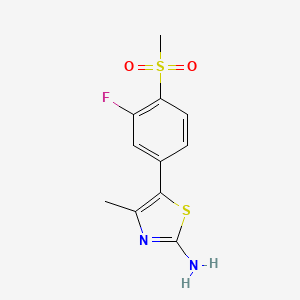

In [104]:
from urllib.request import urlretrieve
from IPython.display import Image

smiles = 'NC1=NC(C)=C(C2=CC=C(S(=O)(C)=O)C(F)=C2)S1'
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/'+smiles+'/PNG', 'smi_pic.png')
p = Image(filename='smi_pic.png')
p

In [105]:
# Import the library necessary for making a web sevice request.
import urllib.request

# Define variables for PUG-REST request URL pieces.
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
input = '/compound/cid/297,6324,6334'
operation = '/property/MolecularFormula,MolecularWeight,XLogP'
output = '/CSV'

# formulate the PUG-REST request URL
url = prolog + input + operation + output

# Make a PUG-REST request and store the output in "request"
request = urllib.request.urlopen(url)

# Print the output.
print(request.read())


b'"CID","MolecularFormula","MolecularWeight","XLogP"\n297,"CH4",16.043,0.6\n6324,"C2H6",30.07,1.3\n6334,"C3H8",44.10,1.8\n'


Here is a much more detailed analysis of how to get to even physical properties with PUG.  I took this all from https://gist.github.com/vo-h/54277bab1bea52d54b7cbbdac109d122#file-untitled0-ipynb  

In [106]:
import requests
from bs4 import BeautifulSoup
import re
#Working with PUG-REST
#Let's try to get all data on aspirin
data = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/aspirin/xml")
#Let's parse this information using Beautiful Soup.
html = BeautifulSoup(data.content, "xml")
#Let's find out what kind of information we can get.
html.find_all("PC-Urn_label")

[<PC-Urn_label>Compound</PC-Urn_label>,
 <PC-Urn_label>Compound Complexity</PC-Urn_label>,
 <PC-Urn_label>Count</PC-Urn_label>,
 <PC-Urn_label>Count</PC-Urn_label>,
 <PC-Urn_label>Count</PC-Urn_label>,
 <PC-Urn_label>Fingerprint</PC-Urn_label>,
 <PC-Urn_label>IUPAC Name</PC-Urn_label>,
 <PC-Urn_label>IUPAC Name</PC-Urn_label>,
 <PC-Urn_label>IUPAC Name</PC-Urn_label>,
 <PC-Urn_label>IUPAC Name</PC-Urn_label>,
 <PC-Urn_label>IUPAC Name</PC-Urn_label>,
 <PC-Urn_label>IUPAC Name</PC-Urn_label>,
 <PC-Urn_label>InChI</PC-Urn_label>,
 <PC-Urn_label>InChIKey</PC-Urn_label>,
 <PC-Urn_label>Log P</PC-Urn_label>,
 <PC-Urn_label>Mass</PC-Urn_label>,
 <PC-Urn_label>Molecular Formula</PC-Urn_label>,
 <PC-Urn_label>Molecular Weight</PC-Urn_label>,
 <PC-Urn_label>SMILES</PC-Urn_label>,
 <PC-Urn_label>SMILES</PC-Urn_label>,
 <PC-Urn_label>Topological</PC-Urn_label>,
 <PC-Urn_label>Weight</PC-Urn_label>]

In [107]:
#Let's get the Molecular Weight. First, we locate the tag.
mw_tag = html.find(name="PC-Urn_label", string="Molecular Weight")
mw_tag

<PC-Urn_label>Molecular Weight</PC-Urn_label>

In [108]:
#Then, let's take a look at the parent of this tag.
mw_parents = mw_tag.find_parent("PC-InfoData")
mw_parents

<PC-InfoData>
<PC-InfoData_urn>
<PC-Urn>
<PC-Urn_label>Molecular Weight</PC-Urn_label>
<PC-Urn_datatype>
<PC-UrnDataType value="string">1</PC-UrnDataType>
</PC-Urn_datatype>
<PC-Urn_version>2.1</PC-Urn_version>
<PC-Urn_software>PubChem</PC-Urn_software>
<PC-Urn_source>ncbi.nlm.nih.gov</PC-Urn_source>
<PC-Urn_release>2021.05.07</PC-Urn_release>
</PC-Urn>
</PC-InfoData_urn>
<PC-InfoData_value>
<PC-InfoData_value_sval>180.16</PC-InfoData_value_sval>
</PC-InfoData_value>
</PC-InfoData>

In [109]:
#The info we want is contained between 'PC-InfoData_value_sval' tag. So let's get to it.
mw = mw_parents.find('PC-InfoData_value_sval').string
mw
#There you go. It takes some playing around with. 
# You can always go to the URL, which will render the data on your browser. 
# That's what I did to help navigate this tree.

'180.16'

In [110]:
#Working with PUG-View
#Let's do the same for PUG-View and see what we can get from it for aspirin.
data = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/2244/xml")
html = BeautifulSoup(data.content, "xml")
#To get an idea of what information is available, we can look up TOCHeadings with html.find_all('TOCHeading'). I'm not gonna run the code here, because it's a really long list. Let's say we want to look up melting points.
mp_tag = html.find(name='TOCHeading', string='Melting Point')
mp_tag

<TOCHeading>Melting Point</TOCHeading>

In [111]:
#If you look at the xml structure, you'll see that this TOCHeading has siblings with tags 'Information'. 
# The information we want is the childrean of these 'Information' tag under the tag 'String.' 
# So, to find the first value, we can do this:
mp_tag.find_next_sibling('Information').find(name='String').string


'275 °F (NTP, 1992)'

In [112]:
#As you can see, these numbers come with not just the units, but annotations on where the data comes from. Not only that, there are multiple values for melting point, since it's experimentally measured. This was quite a long way to find the melting point. An eaiser way is to include what we want in the URL.
data = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/2244/xml?heading=Melting+Point")
html = BeautifulSoup(data.content, "xml")
html.find_all('String')

[<String>275 °F (NTP, 1992)</String>,
 <String>138-140</String>,
 <String>135 °C (rapid heating)</String>,
 <String>135 °C</String>,
 <String>135 °C</String>,
 <String>275 °F</String>,
 <String>275 °F</String>]

#The Materials Project
The Materials Project (MP) is a large database of primarily computed data on primarily inorganic materials.  
* See more general information [here](https://materialsproject.org/).
* See more specific information on the old and new API [here](https://docs.materialsproject.org/downloading-data/how-do-i-download-the-materials-project-database).
* To use the MP create an account [here](https://materialsproject.org/). Then get your API key [here](https://next-gen.materialsproject.org/dashboard).
* Documentation for API is [here](https://docs.materialsproject.org/downloading-data/how-do-i-download-the-materials-project-database), and some cool examples are [here](https://docs.materialsproject.org/downloading-data/using-the-api/examples).

Install pymatgen, a python library of tools that interfaces smoothly with MP.

In [113]:
# %%capture
#!pip install pymatgen

In [114]:
# Put in API key - see above.
MP_API_KEY = "4q9GorcYXzKs3tjfYTjKCQof9OxbxiGR"
print(MP_API_KEY)

4q9GorcYXzKs3tjfYTjKCQof9OxbxiGR


Import the MP restful interface tool and set it to work with your API key. Note that if this shows an error and asks you to restart the runtime please just do that. It seemed to fix the problem for me.

In [115]:
#!pip install mp_api
from mp_api.client import MPRester

Get some data from MP with a simple query of a few structure names. Output from query is a list of dictionaries (here just of length 2) (learn more how to use this data structure here (https://pythonexamples.org/python-list-of-dictionaries/)).

In [116]:
with MPRester(MP_API_KEY) as mpr:
  data = mpr.summary.search(material_ids=["mp-149","mp-19770"])
# Data from first entry
mpid = data[0].material_id       # a Materials Project ID
formula = data[0].formula_pretty # a formula
formula_anon = data[0].formula_anonymous      # a generalized formula
volume = data[0].volume          # a volume
band_gap = data[0].band_gap      # a gap
print(mpid,formula, formula_anon, volume, band_gap)
# Data from second entry
mpid = data[1].material_id       # a Materials Project ID
formula = data[1].formula_pretty # a formula
formula_anon = data[1].formula_anonymous      # a generalized formula
volume = data[1].volume          # a volume
band_gap = data[1].band_gap      # a gap
print(mpid,formula, formula_anon, volume, band_gap)

C:\Users\jhyan\AppData\Roaming\Python\Python311\site-packages\mp_api\client\mprester.py:193: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(
C:\Users\jhyan\AppData\Local\Temp\ipykernel_8560\2501803496.py:2: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  data = mpr.summary.search(material_ids=["mp-149","mp-19770"])


Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

mp-149 Si A 40.32952684741405 0.6105
mp-19770 Fe2O3 A2B3 103.1107530196113 0.0


Here is all the data that was retrieved and put in a python dictionary for one MP materials entry. You can get any one of these data entries X from data[0].X. You can get a summary of all the fields as below as well.

In [117]:
# Print all the data in a MP materials dictionary
#data[0]
# To get all avalailable fields just listed in general use below
mpr.summary.available_fields

C:\Users\jhyan\AppData\Local\Temp\ipykernel_8560\1875606170.py:4: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  mpr.summary.available_fields


['builder_meta',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'property_name',
 'material_id',
 'deprecated',
 'deprecation_reasons',
 'last_updated',
 'origins',
 'warnings',
 'structure',
 'task_ids',
 'uncorrected_energy_per_atom',
 'energy_per_atom',
 'formation_energy_per_atom',
 'energy_above_hull',
 'is_stable',
 'equilibrium_reaction_energy_per_atom',
 'decomposes_to',
 'xas',
 'grain_boundaries',
 'band_gap',
 'cbm',
 'vbm',
 'efermi',
 'is_gap_direct',
 'is_metal',
 'es_source_calc_id',
 'bandstructure',
 'dos',
 'dos_energy_up',
 'dos_energy_down',
 'is_magnetic',
 'ordering',
 'total_magnetization',
 'total_magnetization_normalized_vol',
 'total_magnetization_normalized_formula_units',
 'num_magnetic_sites',
 'num_unique_magnetic_sites',
 'types_of_magnetic_species',
 'k_voigt',
 'k_reuss',
 'k_vrh',
 'g_voigt',
 'g_reuss',
 'g_vrh',


Getting all structures with the same stoichiometry as a target compound (and just get selected fields for each compound to make the retrieval faster).

In [118]:
with MPRester(MP_API_KEY) as mpr:
  formula_anon = "A2B3" #(Fe2O3) (could we do LK-99, Pb9Cu(PO4)6O?)
  data = mpr.materials.search(formula=formula_anon,fields=["material_id", "formula_pretty", "structure"])
  print()
  print('How many compounds like Fe2O3?:'," ",len(data))  # Should show ~1195 data on 9/2023.
  print('Here are the first few')
  for i in range(0,3):
    print(data[i].material_id, data[i].formula_pretty)



Retrieving MaterialsDoc documents:   0%|          | 0/1195 [00:00<?, ?it/s]


How many compounds like Fe2O3?:   1195
Here are the first few
mp-1217073 Ti3S2
mp-1204171 Tb2N3
mp-1217324 Th2Ge3


Get all elastic constant data for all compounds for which it is available.

In [119]:
from mp_api.client import MPRester
from emmet.core.summary import HasProps
with MPRester(MP_API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        has_props = [HasProps.elasticity], fields=["material_id", "formula_pretty", "g_vrh"]
    )
#mpids = [doc.material_id for doc in docs]
for i in range(10):
  print(docs[i].material_id, docs[i].formula_pretty, docs[i].g_vrh)

Retrieving SummaryDoc documents:   0%|          | 0/7108 [00:00<?, ?it/s]

mp-5784 Na2GeO3 27.68974492588605
mp-23004 CsMgCl3 5.178690422625459
mp-4681 NaNbO3 51.42859069677096
mp-754318 MnZnO3 49.919165526982084
mp-555064 Cd(CO2)2 22.56173127288651
mp-865869 Be2CuPt 57.21576110467693
mp-19120 MgCrO4 41.398371080553204
mp-493 Co2B 104.17198466536588
mp-9325 Sr3MnN3 31.667198803438602
mp-4653 Y(SiIr)2 103.49253836516718


In [120]:
print('How many compounds have elastic constants?:'," ",len(docs))

How many compounds have elastic constants?:   7108


**More resources**

In general, almost any data can be obtained from MP using the MPRester, either via the high-level functions or the very powerful "query" method.

For more complex queries, you can refer to the documentation for the Materials API at https://github.com/materialsproject/mapidoc.

# Questions
Please do the following questions.  Just write the code here at the end of the notebook and turn in the notebook and output as pdf.

**Question 1:**  Adapt the above example to get the density of Cs, W, and SiC.  Show code and results below. Please use Wolfram Alpha.

In [121]:
# Question 1 Answer
# Import the dependencies
import wolframalpha

# Build the connection
client = wolframalpha.Client("WRP7HK-TG6H88H2GY")

# Create new list to receive data
density_list = []
query_list = ['Cesium density', 'Tungsten density', 'Silicon Carbide density']

# Loop to get the data
for material in query_list:
    res = client.query(material)
    print(material, next(res.results).text)
    density = float(next(res.results).text.split()[0])
    density_list.append(density)

print(density_list)

Cesium density 1.879 g/cm^3 (grams per cubic centimeter)
Tungsten density 19.25 g/cm^3 (grams per cubic centimeter)
Silicon Carbide density 3.22 g/cm^3 (grams per cubic centimeter)
[1.879, 19.25, 3.22]


**Question 2:** Adapt the above examples to get the chemical name and first boiling point value for CID values 1-100 when this value is available. Please use PubChem.

In [122]:
# Question 2 Answer
# We have discussed in class that this method cannot work
'''
# Import PubChemPy
import pubchempy as pcpy
from pubchemprops.pubchemprops import get_second_layer_props

# Loop to get the chemical name and first boiling point value for CID values 1-100
for cid in range(1, 101):
        # Get the chemical name for CID values 1-100
        c = pcpy.Compound.from_cid(cid)
        print("New Compound CID =", cid)
        print("Chemical Name =", c.iupac_name)

        try:
                # Get non-structural physical (level 2) props from CID
                props = get_second_layer_props(c.iupac_name, ['Boiling Point'])
                if props:
                        print("Boiling Point =", props.get('Boiling Point', "Data not available for this property."))
                else:
                        print("Boiling Point data not available for this compound.")
        except pcpy.PubChemPyError as e:
                # Handle the case where data is not available for the CID
                print(f"Error retrieving data for CID {cid}: {str(e)}")
        except requests.exceptions.HTTPError as e:
                # Handle specific HTTP errors
                if "HTTP Error 404: PUGREST.NotFound" in str(e):
                        print("Data not found for this compound (CID not in PubChem).")
                else:
                        print(f"HTTP Error: {str(e)}")
'''

'\n# Import PubChemPy\nimport pubchempy as pcpy\nfrom pubchemprops.pubchemprops import get_second_layer_props\n\n# Loop to get the chemical name and first boiling point value for CID values 1-100\nfor cid in range(1, 101):\n        # Get the chemical name for CID values 1-100\n        c = pcpy.Compound.from_cid(cid)\n        print("New Compound CID =", cid)\n        print("Chemical Name =", c.iupac_name)\n\n        try:\n                # Get non-structural physical (level 2) props from CID\n                props = get_second_layer_props(c.iupac_name, [\'Boiling Point\'])\n                if props:\n                        print("Boiling Point =", props.get(\'Boiling Point\', "Data not available for this property."))\n                else:\n                        print("Boiling Point data not available for this compound.")\n        except pcpy.PubChemPyError as e:\n                # Handle the case where data is not available for the CID\n                print(f"Error retrieving data 

In [123]:
# Question 2 Answer
# This is a test to get Molecular Formula and Molecular Weight
# 4 Chemicals test 
# Import the necessary libraries
import pubchempy as pcpy

# Loop to get the chemical name, MolecularFormula, and MolecularWeight for CID values 1-100
for cid in range(1, 4):
    try:
        # Get the compound information for the current CID
        compound = pcpy.Compound.from_cid(cid)

        if compound:
            print(f"CID: {cid}")
            print(f"Chemical Name: {compound.iupac_name}")

            # Get MolecularFormula and MolecularWeight
            molecular_formula = compound.molecular_formula
            molecular_weight = compound.molecular_weight

            print(f"Molecular Formula: {molecular_formula}")
            print(f"Molecular Weight: {molecular_weight} g/mol")
            print("-" * 30)
        else:
            print(f"No information available for CID {cid}")
    except pcpy.PubChemPyError as e:
        print(f"Error retrieving data for CID {cid}: {str(e)}")

CID: 1
Chemical Name: 3-acetyloxy-4-(trimethylazaniumyl)butanoate
Molecular Formula: C9H17NO4
Molecular Weight: 203.24 g/mol
------------------------------
CID: 2
Chemical Name: (2-acetyloxy-3-carboxypropyl)-trimethylazanium
Molecular Formula: C9H18NO4+
Molecular Weight: 204.24 g/mol
------------------------------
CID: 3
Chemical Name: 5,6-dihydroxycyclohexa-1,3-diene-1-carboxylic acid
Molecular Formula: C7H8O4
Molecular Weight: 156.14 g/mol
------------------------------


In [124]:
# Question 2 Answer
# Import the library necessary for making a web sevice request
import urllib.request
# Import PubChemPy
import pubchempy as pcpy
from pubchemprops.pubchemprops import get_second_layer_props

# Define variables for PUG-REST request URL pieces.
prolog1 = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
prolog2 = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug_view'

# Loop to get the chemical name and first boiling point value for CID values 1-100
for cid in range(1, 3):
        # Get the chemical name for CID values 1-100
        c = pcpy.Compound.from_cid(cid)

        # Get the MolecularFormula
        input1 = f'/compound/cid/{c.cid}' 
        operation1 = '/property/MolecularFormula'
        output1 = '/xml'

        # Get the Boiling Point
        input2 = f'/data/compound/{c.cid}' 
        operation2 = '/xml?heading=Boiling+Point'

        # formulate the PUG-REST request URL
        url1 = prolog1 + input1 + operation1 + output1
        url2 = prolog2 + input2 + operation2

        # Make a PUG-REST request and store the output in "request"
        request1 = requests.get(url1)
        request2 = requests.get(url2)

        # Print the output
        #print(request1.text)
        #print(request2.text)


**Question 3:**  Plot log base 10 of an effective **bulk modulus** (specifically, the log of average denoted as **g_vrh** in MP) vs. log base 10 of the **atomic volume** (ie, the average volume/atom in a unit cell in A^3) for the data in the MP database. Only include g_vrh in the range 1-1000 GPa (standard unit) and atomic volume in the range 1-64 A^3/atom, as values outside these ranges are somewhat unphysical. To help break it down consider:

1. Learn how to plot X,Y with matplotlib on numpy vectors.
2. Make sure you understand the example to get g_vhr from above and extend it to get volume and number of atoms (nsites is the variable that stores this info in the returned dictionary) as well. Take log of the values.
5. Make a plot of Log(g_vhr) vs. Log(atomic volume).

Always consider working with a small number of examples before running on all of iterate quickly. Please use Materials Project.

Retrieving SummaryDoc documents:   0%|          | 0/7108 [00:00<?, ?it/s]

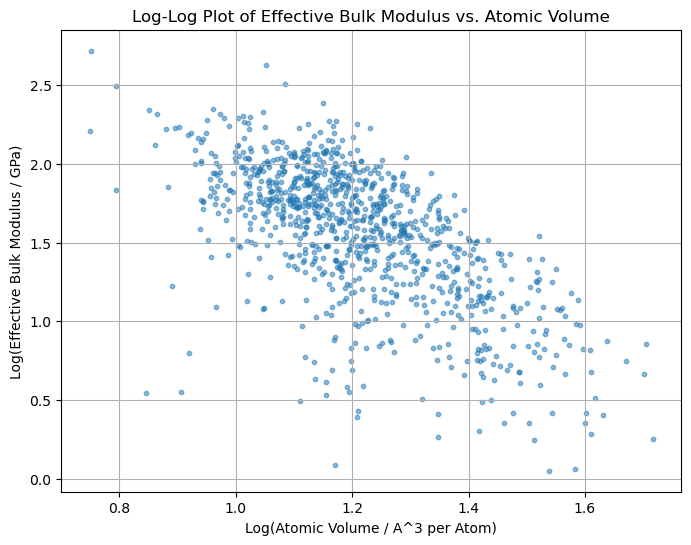

In [125]:
# Question 3 Answer
# Put in API key
MP_API_KEY = "4q9GorcYXzKs3tjfYTjKCQof9OxbxiGR"

# Import the library necessary for making a web sevice request
from mp_api.client import MPRester
from emmet.core.summary import HasProps
import numpy as np
import matplotlib.pyplot as plt

# Get the access
with MPRester(MP_API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        has_props = [HasProps.elasticity], fields=["material_id", "formula_pretty", "g_vrh", "nsites", "volume"]
    )

# Create new array
gvrh = []
vol = []

# Loop to get the result
# Test with 1000 compounds
for i in range(1000):
    if 1 <= docs[i].g_vrh <= 1000:
        if 1 <= docs[i].volume/docs[i].nsites <= 64:
            gvrh.append(docs[i].g_vrh)
            vol.append(docs[i].volume/docs[i].nsites)

# Print out the result
#print(len(gvrh))
#print(len(vol))
#print(gvrh)
#print(vol)

# log calculation
log_g_vrh = np.log10(gvrh)
log_atomic_volume = np.log10(vol)

# Plot the log graph
plt.figure(figsize=(8, 6))
plt.scatter(log_atomic_volume, log_g_vrh, s=10, alpha=0.5)
plt.xlabel("Log(Atomic Volume / A^3 per Atom)")
plt.ylabel("Log(Effective Bulk Modulus / GPa)")
plt.title("Log-Log Plot of Effective Bulk Modulus vs. Atomic Volume")
plt.grid(True)
plt.savefig("lab2_3.png")
plt.show()

